<a href="https://colab.research.google.com/github/Hemanthk408/Beer-production/blob/main/Beer_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/beer_states.csv")

In [3]:
df

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises
...,...,...,...,...
1867,total,2015,17750504.62,Kegs and Barrels
1868,total,2016,17000382.28,Kegs and Barrels
1869,total,2017,16514866.69,Kegs and Barrels
1870,total,2018,15662381.42,Kegs and Barrels


In [4]:
df.nunique()

,0
state,52
year,12
barrels,1848
type,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   object 
 1   year     1872 non-null   int64  
 2   barrels  1853 non-null   float64
 3   type     1872 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ KB


In [6]:
df=pd.DataFrame(df)

In [7]:
df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [8]:
df['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'total'], dtype=object)

In [9]:
df["type"].unique()

array(['On Premises', 'Bottles and Cans', 'Kegs and Barrels'],
      dtype=object)

In [10]:
mapping={'On Premises':1, 'Bottles and Cans':0, 'Kegs and Barrels':2}

In [11]:
mapping


{'On Premises': 1, 'Bottles and Cans': 0, 'Kegs and Barrels': 2}

In [12]:
df['type']=df['type'].replace(mapping)

<ipython-input-12-f2bfdcb0444b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type']=df['type'].replace(mapping)


In [13]:
df['type']

,type
0,1
1,1
2,1
3,1
4,1
...,...
1867,2
1868,2
1869,2
1870,2


In [14]:
df.isnull().sum()

,0
state,0
year,0
barrels,19
type,0


In [15]:
df['barrels']=df['barrels'].fillna(method='ffill')

<ipython-input-15-c2d359347167>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['barrels']=df['barrels'].fillna(method='ffill')


In [16]:
df.isnull().sum()

,0
state,0
year,0
barrels,0
type,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   object 
 1   year     1872 non-null   int64  
 2   barrels  1872 non-null   float64
 3   type     1872 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 58.6+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
for i in df.select_dtypes(include=["object"]).columns:
  df[i]=encoder.fit_transform(df[[i]])


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df

,state,year,barrels,type
0,0,2008,2067.69,1
1,0,2009,2263.65,1
2,0,2010,1929.15,1
3,0,2011,2251.02,1
4,0,2012,2312.43,1
...,...,...,...,...
1867,51,2015,17750504.62,2
1868,51,2016,17000382.28,2
1869,51,2017,16514866.69,2
1870,51,2018,15662381.42,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   int64  
 1   year     1872 non-null   int64  
 2   barrels  1872 non-null   float64
 3   type     1872 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 58.6 KB


In [22]:
df.corr()

,state,year,barrels,type
state,1.000000e+00,-9.424332e-16,0.144253,7.450801e-16
year,-9.424332e-16,1.000000e+00,-0.005593,-2.951065e-13
barrels,1.442526e-01,-5.593203e-03,1.000000,-1.692831e-01
type,7.450801e-16,-2.951065e-13,-0.169283,1.000000e+00


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-24-e9f7707f1184>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["year"])


<Axes: xlabel='year', ylabel='Density'>

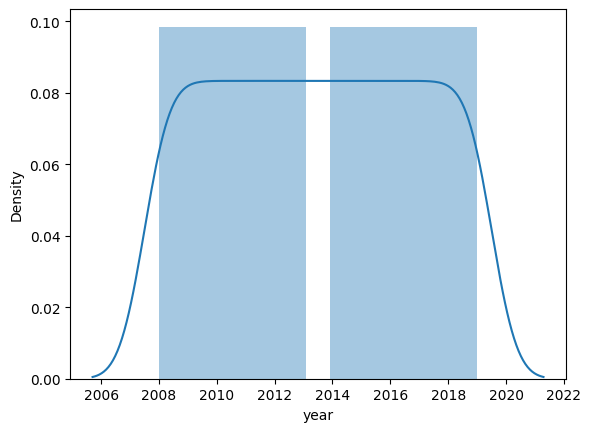

In [24]:
sns.distplot(df["year"])

<ipython-input-25-71836cdfda85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['state'])


<Axes: xlabel='state', ylabel='Density'>

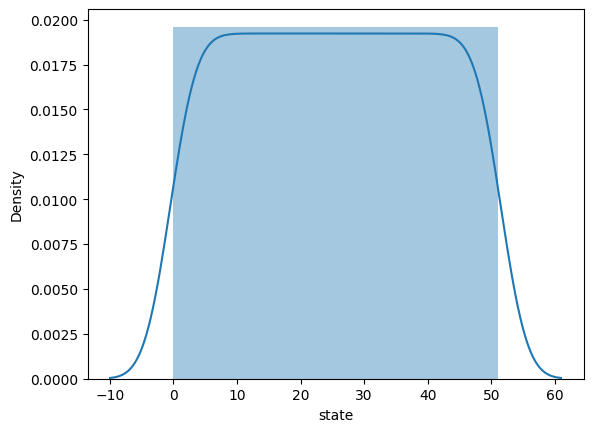

In [25]:
sns.distplot(df['state'])

<ipython-input-26-f14bdd90cf41>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['barrels'])


<Axes: xlabel='barrels', ylabel='Density'>

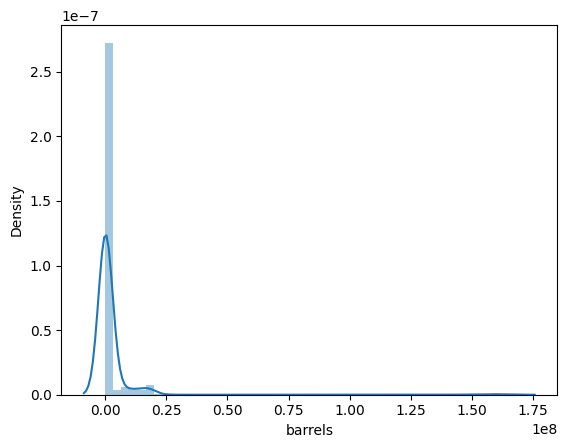

In [26]:
sns.distplot(df['barrels'])

<ipython-input-27-bc48ce2f422a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['type'])


<Axes: xlabel='type', ylabel='Density'>

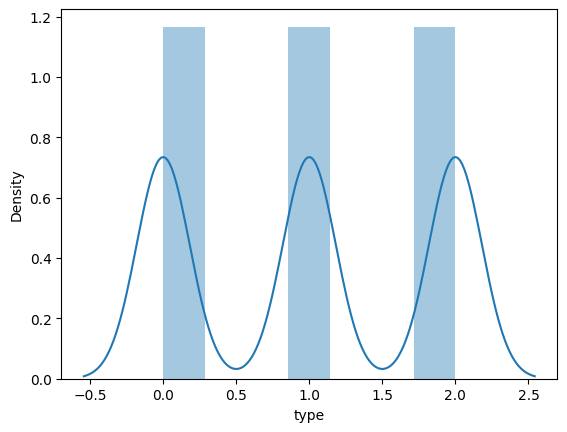

In [27]:
sns.distplot(df['type'])

In [28]:
df['type'].mode()

,type
0,0
1,1
2,2


In [29]:
from scipy.stats import norm